#In the fiercely competitive streaming industry, accurately predicting Netflix's subscription numbers is crucial for strategic planning and informed decision-making. This article delves into the intricacies of forecasting Netflix's subscriber count using Python. By mastering this skill, you can significantly bolster operational efficiency, refine financial planning, and optimize content strategies to drive growth and success in this dynamic landscape.

# Navigating the Forecasting Journey for Netflix Subscriptions

In [1]:
# Importing Necessay Python libraries
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
Data = pd.read_csv("/content/Netflix-Subscriptions.csv")
Data.head()

,Time Period,Subscribers
0,01/04/2013,34240000
1,01/07/2013,35640000
2,01/10/2013,38010000
3,01/01/2014,41430000
4,01/04/2014,46130000


##Let's transition the Time Period column into a datetime format before progressing. This dataset encompasses Netflix subscription counts at the onset of every quarter spanning from 2013 to 2023.

In [3]:
Data['Time Period'] = pd.to_datetime(Data['Time Period'],
                                     format='%d/%m/%Y')
Data.head()

,Time Period,Subscribers
0,2013-04-01,34240000
1,2013-07-01,35640000
2,2013-10-01,38010000
3,2014-01-01,41430000
4,2014-04-01,46130000


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time Period  42 non-null     datetime64[ns]
 1   Subscribers  42 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 800.0 bytes


##Let's delve into Netflix's quarterly subscription growth.

In [5]:
fig = go.Figure()


fig.add_trace(
    go.Scatter(
        x=Data['Time Period'],
        y=Data['Subscribers'],
        mode='lines',
        name='Subscribers'
    )
)


fig.update_layout(
    title='Netflix Quarterly Subscriptions Growth',
    xaxis_title='Date',
    yaxis_title='Number of Subscriptions'
)


fig.show()

##Given the absence of clear seasonality in the Netflix subscriber growth data, employing a forecasting method such as ARIMA (AutoRegressive Integrated Moving Average) seems suitable.

##Let's visualize the quarterly growth rate of Netflix subscribers by plotting the percentage change between consecutive quarters.

In [6]:
import plotly.graph_objects as go

# Calculate the quarterly growth rate
Data['Quarterly Growth Rate'] = Data['Subscribers'].pct_change() * 100

# Determine bar color based on growth rate direction
Data['Bar Color'] = Data['Quarterly Growth Rate'].apply(lambda x: 'green' if x > 0 else 'red')

# Plot the quarterly growth rate using bar graphs
fig = go.Figure()
fig.add_trace(go.Bar(
    x=Data['Time Period'],
    y=Data['Quarterly Growth Rate'],
    marker_color=Data['Bar Color'],
    name='Quarterly Growth Rate'
))
fig.update_layout(
    title='Netflix Quarterly Subscriptions Growth Rate',
    xaxis_title='Time Period',
    yaxis_title='Quarterly Growth Rate (%)'
)
fig.show()

Let's examine the annual growth rate of Netflix subscribers.

In [7]:
import plotly.graph_objects as go

# Calculate the yearly growth rate
Data['Year'] = Data['Time Period'].dt.year
yearly_growth = Data.groupby('Year')['Subscribers'].pct_change().fillna(0) * 100

# Determine bar color based on growth rate direction
bar_color = yearly_growth.apply(lambda x: 'green' if x > 0 else 'red')

# Plot the yearly subscriber growth rate using bar graphs
fig = go.Figure()
fig.add_trace(go.Bar(
    x=Data['Year'],
    y=yearly_growth,
    marker_color=bar_color,
    name='Yearly Growth Rate'
))
fig.update_layout(
    title='Netflix Yearly Subscriber Growth Rate',
    xaxis_title='Year',
    yaxis_title='Yearly Growth Rate (%)'
)
fig.show()

#Let's employ ARIMA for forecasting quarterly subscriptions with Netflix.

#Let's begin our Time Series Forecasting journey by applying ARIMA to predict Netflix subscription numbers. We'll kick off by transforming the data into a time series format.

###We'll transform the original DataFrame into a time series format, where the "Time Period" column serves as the index and the "Subscribers" column represents the data.

In [8]:
time_series = Data.set_index('Time Period')['Subscribers']

###Let's visualize the ACF and PACF of the differenced time series to determine the appropriate values of \( p \) and \( q \) for the ARIMA model.

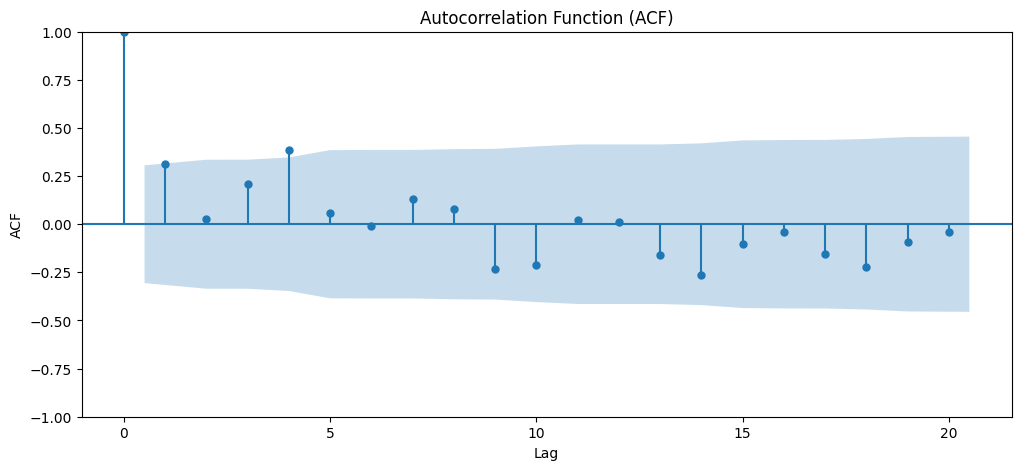

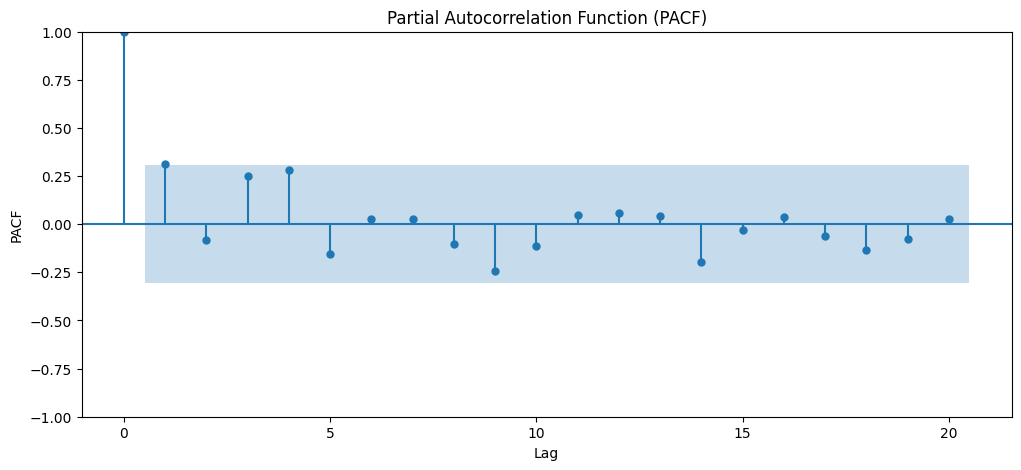

In [9]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Compute first-order difference of the time series
diff_series = Data['Subscribers'].diff().dropna()

# Plot ACF
plt.figure(figsize=(12, 5))
plot_acf(diff_series, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 5))
plot_pacf(diff_series, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

##After computing the differenced time series from the original data, removing any resulting NaN values, we utilized the ACF and PACF plots to discern potential orders for the AR and MA components within the time series. These visualizations serve as valuable aids in determining suitable parameters for the ARIMA model in time series forecasting.

##Upon analysis of the plots, we determined that \( p = 1 \) and \( q = 1 \). The ACF plot indicates a cutoff at lag 1, suggesting \( q = 1 \), while the PACF plot also exhibits a cutoff at lag 1, suggesting \( p = 1 \). Additionally, due to the presence of a linear trend in the subscription growth rate, we opted to set \( d = 1 \) to eliminate this trend and render the time series stationary.

In [10]:
# Define the parameters
p, d, q = 1, 1, 1

# Create and fit the ARIMA model
model = ARIMA(time_series, order=(p, d, q))
results = model.fit()

# Print the summary of the model
print(results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.



                               SARIMAX Results                                
Dep. Variable:            Subscribers   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -672.993
Date:                Wed, 08 May 2024   AIC                           1351.986
Time:                        21:36:11   BIC                           1357.127
Sample:                    04-01-2013   HQIC                          1353.858
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.012     80.765      0.000       0.975       1.024
ma.L1         -0.9908      0.221     -4.476      0.000      -1.425      -0.557
sigma2      1.187e+13   1.57e-14   7.57e+26      0.0

#Let's forecast the number of subscribers for the next five quarters using the trained ARIMA model:

In [16]:
future_steps = 5
predictions = results.predict(start=len(time_series), end=len(time_series) + future_steps - 1)
predictions = predictions.astype(int)
print(predictions)

2023-10-01    243321458
2024-01-01    248251648
2024-04-01    253180570
2024-07-01    258108224
2024-10-01    263034611
Freq: QS-OCT, Name: predicted_mean, dtype: int64


#Let's visualize the forecasted results for Netflix subscriptions over the next five quarters:

In [17]:
# Create a DataFrame with the original data and predictions
forecast = pd.DataFrame({'Original': time_series, 'Predictions': predictions})

# Initialize the figure
fig = go.Figure()

# Add trace for predictions
fig.add_trace(go.Scatter(
    x=forecast.index,
    y=forecast['Predictions'],
    mode='lines',
    name='Predictions'
))

# Add trace for original data
fig.add_trace(go.Scatter(
    x=forecast.index,
    y=forecast['Original'],
    mode='lines',
    name='Original Data'
))

# Update layout
fig.update_layout(
    title='Netflix Quarterly Subscription Predictions',
    xaxis_title='Time Period',
    yaxis_title='Subscribers',
    legend=dict(x=0.1, y=0.9),
    showlegend=True
)

# Display the figure
fig.show()

#Netflix Quarterly Subscription Predictions Dashboard

In [13]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 18.5 MB/s eta 0:00:00


In [38]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.graph_objs as go


# Initialize Dash app
app = dash.Dash(__name__)

# Define custom styles
styles = {
    'container': {
        'width': '80%',
        'margin': 'auto',
        'padding': '20px',
        'borderRadius': '10px',
        'backgroundColor': '#f3f4f6',
        'boxShadow': '0px 0px 20px 0px rgba(0,0,0,0.1)'
    },
    'header': {
        'textAlign': 'center',
        'marginBottom': '30px'
    },
    'title': {
        'fontSize': '36px',
        'fontWeight': 'bold',
        'color': '#333',
        'marginBottom': '20px'
    },
    'label': {
        'fontSize': '18px',
        'color': '#555',
        'marginRight': '10px'
    },
    'input': {
        'fontSize': '16px',
        'width': '80px',
        'marginRight': '20px'
    },
    'button': {
        'fontSize': '16px',
        'backgroundColor': '#6ab04c',
        'color': 'white',
        'padding': '12px 24px',
        'border': 'none',
        'borderRadius': '5px',
        'cursor': 'pointer',
        'transition': 'background-color 0.3s',
        'outline': 'none',
        'boxShadow': '0px 2px 5px 0px rgba(0,0,0,0.1)'
    },
    'button:hover': {
        'backgroundColor': '#5c9440'
    },
    'graph-container': {
        'margin': 'auto',
        'width': '90%',
        'textAlign': 'center'
    },
    'message': {
        'textAlign': 'center',
        'fontSize': '18px',
        'marginTop': '20px',
        'color': 'red'
    }
}

# Layout of the dashboard
app.layout = html.Div(
    [
        html.Div(
            [
                html.H1("Netflix Quarterly Subscription Predictions", style=styles['title']),
                html.Div(
                    [
                        html.Label("Enter the number of quarters:", style=styles['label']),
                        dcc.Input(id='quarters-input', type='number', style=styles['input'], placeholder='Enter a number'),
                        html.Button('Predict', id='predict-button', n_clicks=0, style=styles['button']),
                    ],
                    style={'textAlign': 'center'}
                ),
                html.Div(id='graph-output', style=styles['graph-container']),
                html.Div(id='message-output', style=styles['message'])
            ],
            style=styles['container']
        )
    ]
)

# Callback to update graph based on user input
@app.callback(
    [Output('graph-output', 'children'), Output('message-output', 'children')],
    [Input('predict-button', 'n_clicks')],
    [Input('quarters-input', 'value')]
)
def update_graph(n_clicks, quarters):
    if n_clicks == 0:
        return None, None
    if quarters is None:
        return None, "Please enter the number of quarters."

    # Make predictions based on user input
    future_steps = quarters
    predictions = results.predict(start=len(time_series), end=len(time_series) + future_steps - 1)
    predictions = predictions.astype(int)

    # Create a DataFrame with the original data and predictions
    forecast = pd.DataFrame({'Original': time_series, 'Predictions': predictions})

    # Initialize the figure
    fig = go.Figure()

    # Add trace for predictions
    fig.add_trace(go.Scatter(
        x=forecast.index,
        y=forecast['Predictions'],
        mode='lines',
        name='Predictions'
    ))

    # Add trace for original data
    fig.add_trace(go.Scatter(
        x=forecast.index,
        y=forecast['Original'],
        mode='lines',
        name='Original Data'
    ))

    # Update layout
    fig.update_layout(
        title='Netflix Quarterly Subscription Predictions',
        xaxis_title='Time Period',
        yaxis_title='Subscribers',
        legend=dict(x=0.1, y=0.9),
        showlegend=True
    )

    # Return the figure and message
    return dcc.Graph(figure=fig), None

In [39]:
# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>